In [2]:
import pandas as pd

In [3]:
file_path="/content/drive/MyDrive/cdac assignment/project/dataset/TravelInsurancePrediction.csv"
df=pd.read_csv(file_path,index_col = 0)

**Pre Processing**

In [4]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [5]:
df.shape

(1987, 9)

In [6]:
df.columns

Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

**Descriptive Analysis**

In [7]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [8]:
df.isna().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [9]:
df.nunique()

Age                    11
Employment Type         2
GraduateOrNot           2
AnnualIncome           30
FamilyMembers           8
ChronicDiseases         2
FrequentFlyer           2
EverTravelledAbroad     2
TravelInsurance         2
dtype: int64

In [10]:
df.dtypes

Age                     int64
Employment Type        object
GraduateOrNot          object
AnnualIncome            int64
FamilyMembers           int64
ChronicDiseases         int64
FrequentFlyer          object
EverTravelledAbroad    object
TravelInsurance         int64
dtype: object

**Observations:**
*   In this dataset no column has na values
*    Also no column has only one unique value. So no need to drop any column.



**Total columns = 9**

*    6 categorical columns :Employment Type, GraduateOrNot, ChronicDiseases,    FrequentFlyer, EverTravelledAbroad, TravelInsurance.

*   3 continuous columns :Age, AnnualIncome, FamilyMembers.   
    
        


In [11]:
column_object=df.select_dtypes(include='object').columns
column_object

Index(['Employment Type', 'GraduateOrNot', 'FrequentFlyer',
       'EverTravelledAbroad'],
      dtype='object')

In [12]:
df.loc[:,'Employment Type'].unique()

array(['Government Sector', 'Private Sector/Self Employed'], dtype=object)

In [13]:
df.loc[:,'GraduateOrNot'].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df.loc[:,'FrequentFlyer'].unique()

array(['No', 'Yes'], dtype=object)

In [15]:
df.loc[:,'EverTravelledAbroad'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


**Train Test Split**

In [18]:
X = df.drop('TravelInsurance',axis = 1)
Y = df.loc(['TravelInsurance'])

In [31]:
Y.value_counts(normalize =True)

0    0.642677
1    0.357323
Name: TravelInsurance, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3 ,random_state = 7,stratify = Y)


**Outlier Detection**
*   only for X_train




In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

{'whiskers': [<matplotlib.lines.Line2D at 0x793d17de5870>,
 'caps': [<matplotlib.lines.Line2D at 0x793d17de5db0>,
 'boxes': [<matplotlib.lines.Line2D at 0x793d17de55d0>],
 'medians': [<matplotlib.lines.Line2D at 0x793d17de62f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x793d17de6590>],
 'means': []}

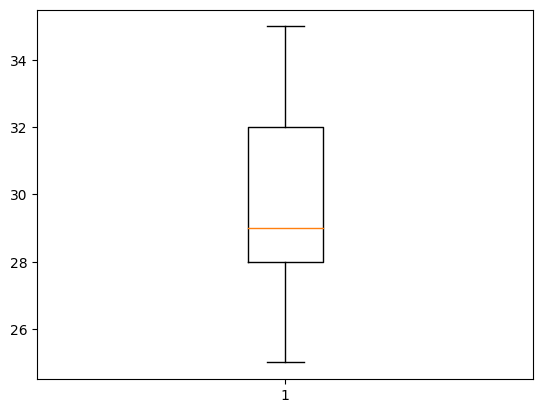

In [38]:
plt.boxplot(X_train['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x793d17e3bd90>,
 'caps': [<matplotlib.lines.Line2D at 0x793d17e70310>,
 'boxes': [<matplotlib.lines.Line2D at 0x793d17e3baf0>],
 'medians': [<matplotlib.lines.Line2D at 0x793d17e70850>],
 'fliers': [<matplotlib.lines.Line2D at 0x793d17e70af0>],
 'means': []}

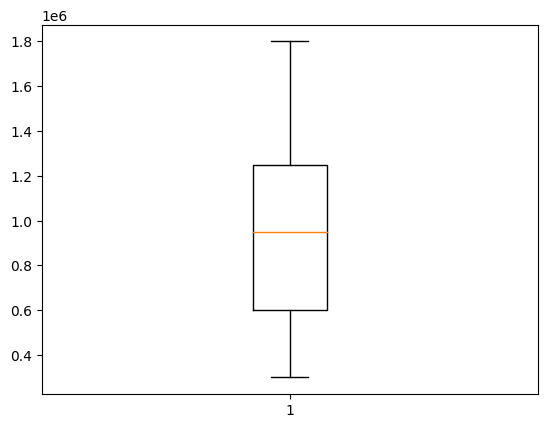

In [39]:
plt.boxplot(X_train['AnnualIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0x793d17eafa60>,
 'caps': [<matplotlib.lines.Line2D at 0x793d17eaffa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x793d17eaf7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x793d17ce8520>],
 'fliers': [<matplotlib.lines.Line2D at 0x793d17ce87c0>],
 'means': []}

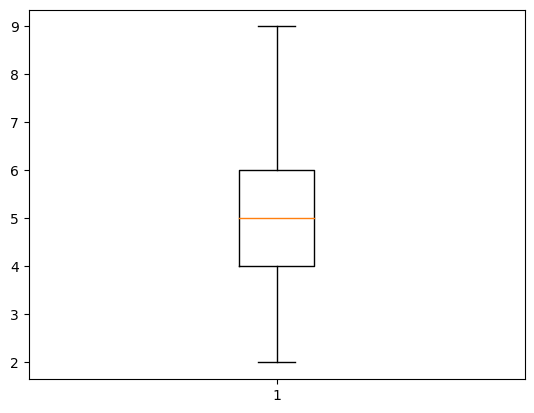

In [40]:
plt.boxplot(X_train['FamilyMembers'])

In [46]:
X_train_iqr = X_train.copy()

In [50]:
numeric_columns = ['Age','AnnualIncome','FamilyMembers']

In [53]:
def outlier_imputation_IQR(df,col):
    q1, q3 = df[col].quantile([0.25,0.75])
    iqr = q3 -q1

    df.loc[df[col] < (q1-1.5*iqr),col ] = (q1-1.5*iqr)
    df.loc[df[col] > (q3+1.5*iqr),col ] = (q3+1.5*iqr)
    return df

for col in numeric_columns:
    X_train_iqr = outlier_imputation_IQR(X_train_iqr,col)

X_train_iqr.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases
count,1390.000000,1.390000e+03,1390.000000,1390.000000
mean,29.690647,9.381295e+05,4.774101,0.276259
std,2.893972,3.766006e+05,1.628372,0.447307
min,25.000000,3.000000e+05,2.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000
50%,29.000000,9.500000e+05,5.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000


**Observations:**

*   No outliers in Age, AnnualIncome, FamilyMembers columns.
*   so outlier handling step can be skipped
    